# EJEMPLO DE EDGE DETECTION

<a href="https://www.pieriandata.com"><img src="https://process.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/resize=height:60/https://d2vvqscadf4c1f.cloudfront.net/IpBXR4beTRO0HhWWSAB7_Pierian%20Data%20Logo%20blue-01.jpg"></a>
*Copyright by Pierian Data Inc.*

# Canny Edge Detection
https://en.wikipedia.org/wiki/Canny_edge_detector

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/sammy_face.jpg')

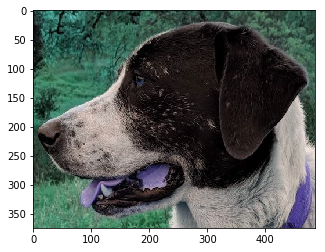

In [20]:
plt.imshow(img)

In [22]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

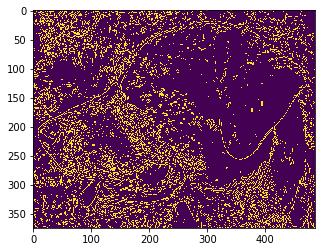

In [23]:
plt.imshow(edges)

In [24]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)

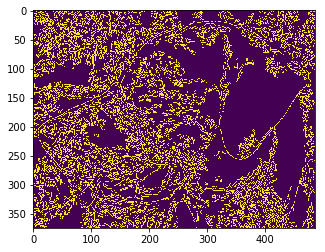

In [25]:
plt.imshow(edges)

## Choosing Thresholds

https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

In [27]:
# Calculate the median pixel value
med_val = np.median(img) 

In [28]:
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))

In [29]:
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

In [30]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

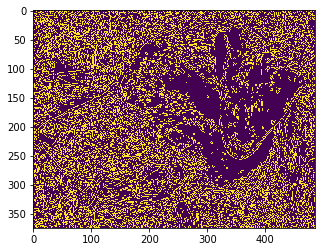

In [31]:
plt.imshow(edges)

Sometimes it helps to blur the images first, so we don't pick up minor edges.

In [12]:
blurred_img = cv2.blur(img,ksize=(5,5))

In [13]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

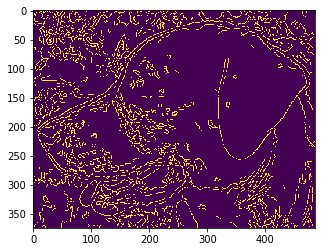

In [14]:
plt.imshow(edges)

In [15]:
lower

44

In [16]:
upper

83

Let's play around with these threshold values even further!
Often you'll need to experiment in regards to your specific dataset and what your final goal is.

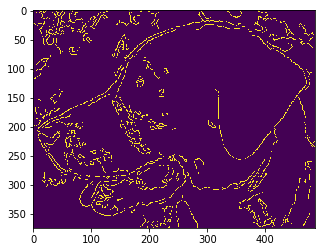

In [17]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

## OBSERVACIONES DETECCION ANTERIOR

El perro se distingue porque esta en primer plano

# Canny Edge Detection NIKKI

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
img = cv2.imread('/Users/daniel/OAN/SID/sid_image_extractor/maps_images/Monnon_5_19_500.png',0)

In [4]:
img = img[1000:1500,800:1200]

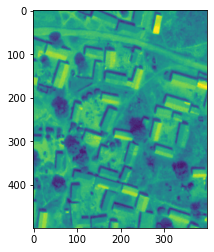

In [5]:
plt.imshow(img)

In [6]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

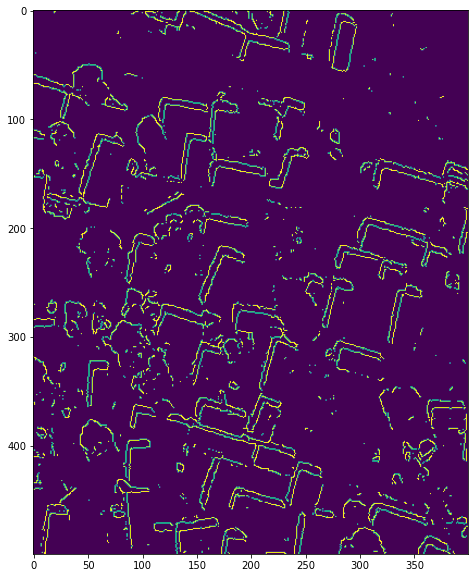

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(edges)

In [8]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)

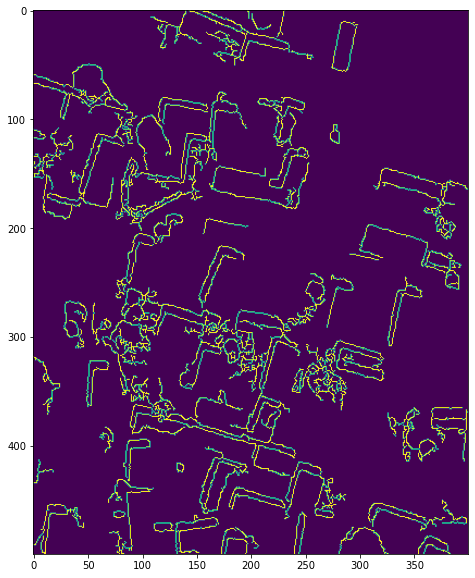

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(edges)

## Choosing Thresholds

https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

In [10]:
# Calculate the median pixel value
med_val = np.median(img)
med_val

149.0

In [11]:
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))
lower

104

In [12]:
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))
upper

193

In [13]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

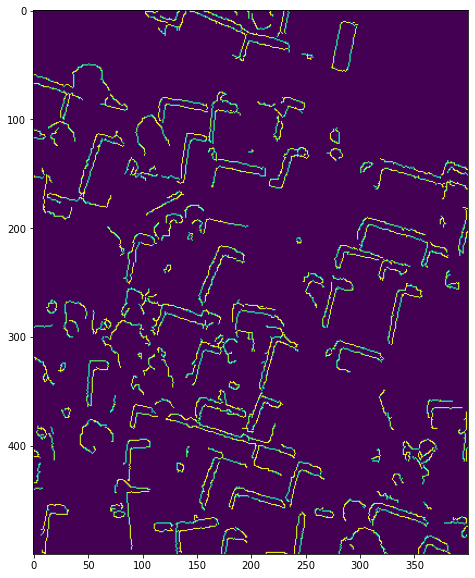

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(edges)

Sometimes it helps to blur the images first, so we don't pick up minor edges.

In [15]:
blurred_img = cv2.blur(img,ksize=(5,5))

In [16]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

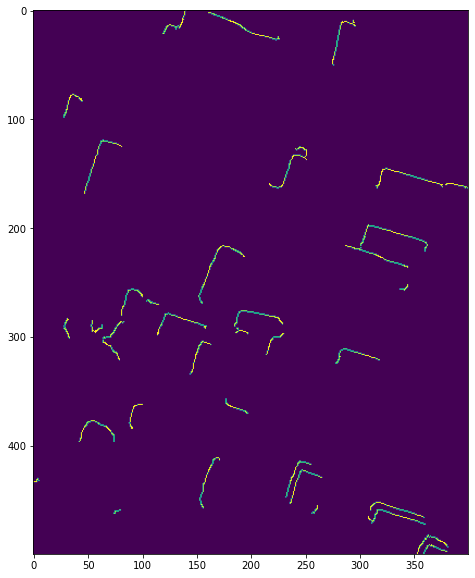

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(edges)

In [18]:
lower

104

In [19]:
upper

193

Let's play around with these threshold values even further!
Often you'll need to experiment in regards to your specific dataset and what your final goal is.

In [20]:
#for i in range(50):
#    edges = cv2.Canny(image=img, threshold1=i*10, threshold2=(i+1)*10,L2gradient=True)
#
#    print(i*10)
#    plt.figure(figsize=(20,10))
#    plt.imshow(img)
#    plt.show()
#    plt.figure(figsize=(20,10))
#    plt.imshow(edges)
#    plt.show()
#

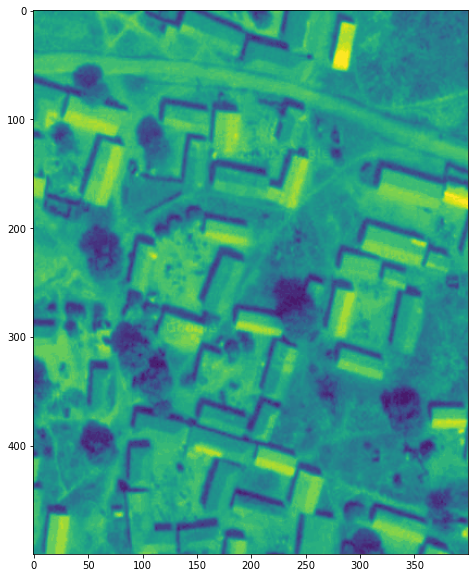

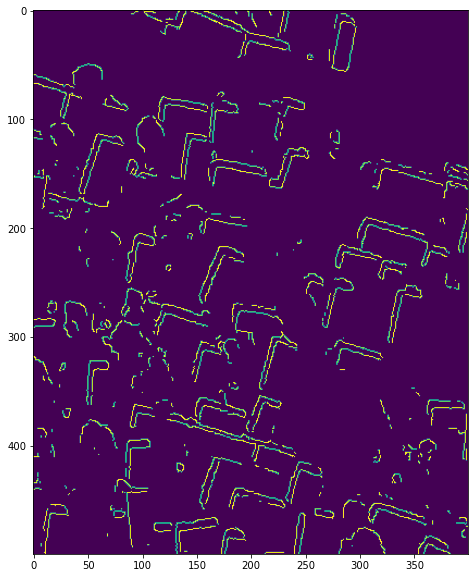

In [21]:
edges = cv2.Canny(image=img, threshold1=120, threshold2=130,L2gradient=True)


plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(edges)
plt.show()



In [22]:
#for i in range(50):
#    blurred_img = cv2.blur(img,ksize=(5,5))
#    edges = cv2.Canny(image=blurred_img, threshold1=i*10, threshold2=(i+1)*10,L2gradient=True)
#
#    print(i*10)
#    plt.figure(figsize=(20,10))
#    plt.imshow(edges)
#    plt.show()


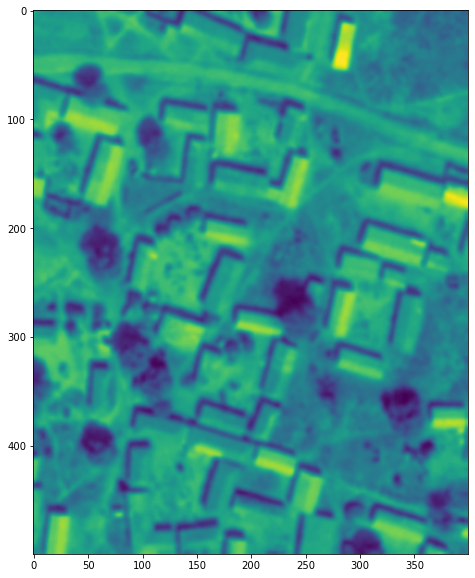

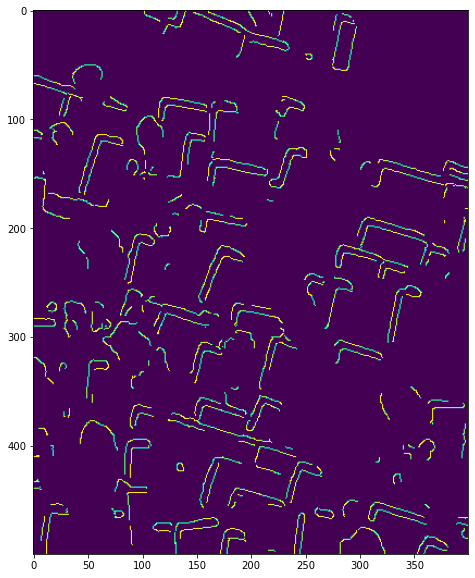

In [27]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=80, threshold2=90,L2gradient=True)

plt.figure(figsize=(20,10))
plt.imshow(blurred_img)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(edges)
plt.show()



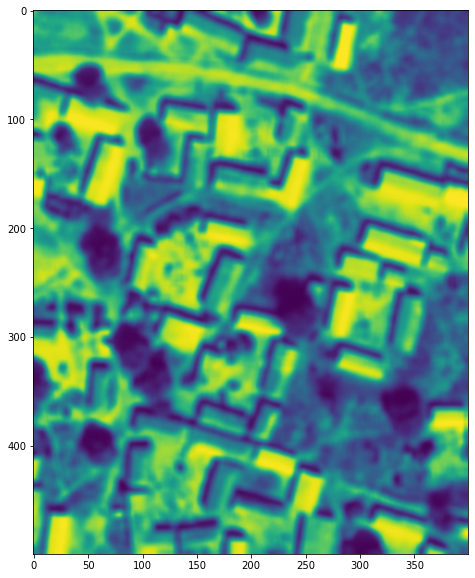

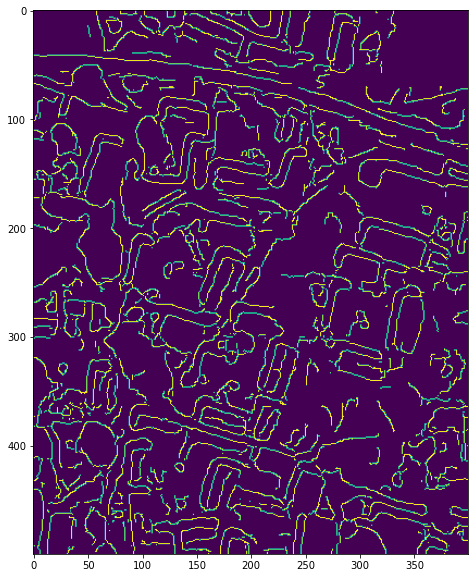

In [29]:
blurred_img = cv2.blur(cv2.equalizeHist(img),ksize=(7,7))
edges = cv2.Canny(image=blurred_img, threshold1=50, threshold2=80,L2gradient=True)

plt.figure(figsize=(20,10))
plt.imshow(blurred_img)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(edges)
plt.show()



### INTENTEMOS DETECTAR ESQUINAS EN ESOS BORDS

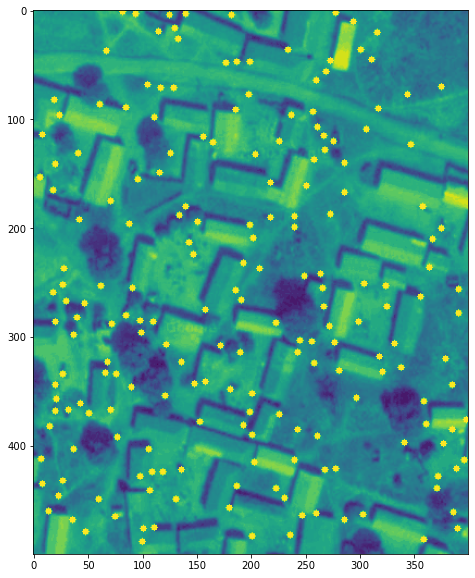

In [30]:
img_copy = img.copy()
corners = cv2.goodFeaturesToTrack(edges,200,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img_copy,(x,y),3,255,-1)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_copy)

## DETECTAR esquinas sin haber hecho CANNY

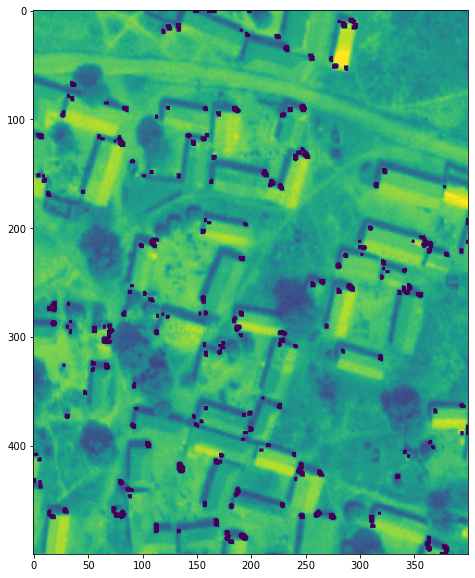

In [32]:
img_copy = img.copy()
gray = np.float32(img_copy)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=21,k=0.01)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst2 = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_copy[dst2>0.1*dst2.max()]=0
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_copy)

In [33]:
# Sharpen image
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#img_sha = cv2.filter2D(img, -1, kernel)
#plt.figure(figsize=(20,10))
#plt.imshow(img_sha)
#plt.show()
#for i in range(50):
#    
#    edges = cv2.Canny(image=img_sha, threshold1=i*10, threshold2=(i+4)*10,L2gradient=True)
#
#    print(i*10)
#    plt.figure(figsize=(20,10))
#    plt.imshow(edges)
#    plt.show()
#

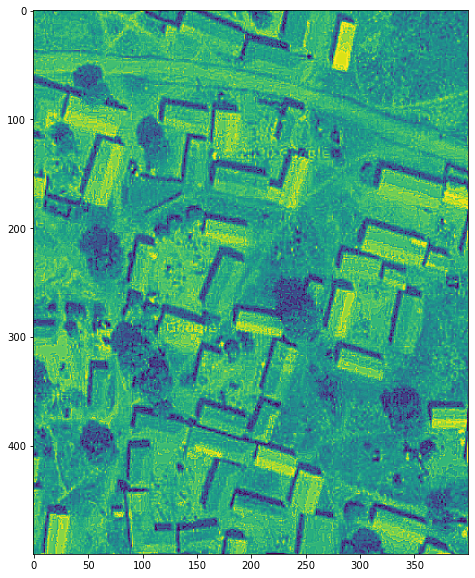

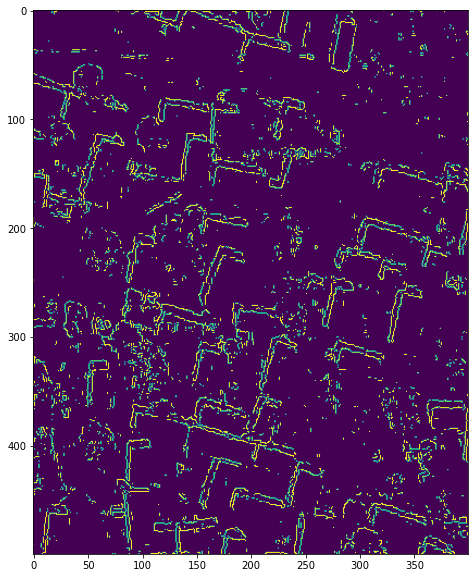

In [34]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_sha = cv2.filter2D(img, -1, kernel)
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=img_sha, threshold1=300, threshold2=320,L2gradient=True)

plt.figure(figsize=(20,10))
plt.imshow(img_sha)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(edges)
plt.show()



### LETs TRY TO ZOOM IN

In [35]:
img.shape

(500, 400)

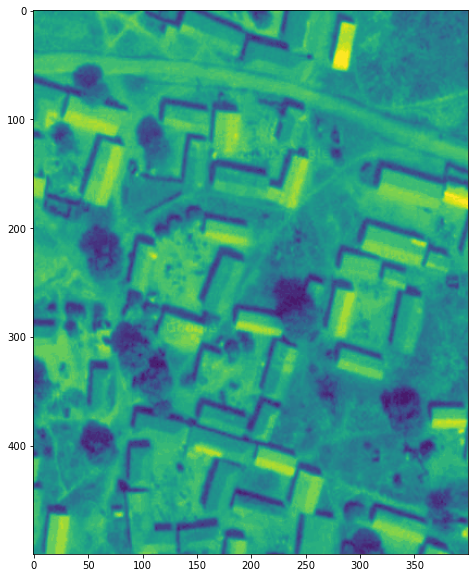

In [36]:
plt.figure(figsize=(20,10))
plt.imshow(img)

In [45]:
img_zoom = img[250:350,150:250]

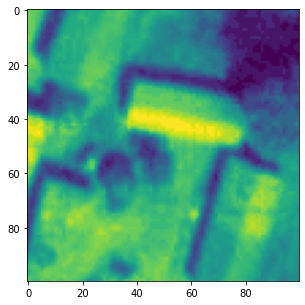

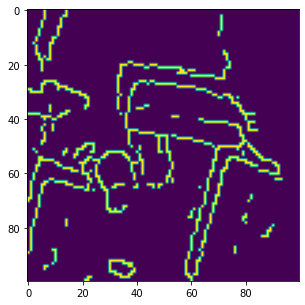

In [46]:
plt.figure(figsize=(5,5))
plt.imshow(img_zoom)
edges = cv2.Canny(image=img_zoom, threshold1=80, threshold2=90,L2gradient=True)

plt.figure(figsize=(5,5))
plt.imshow(edges)

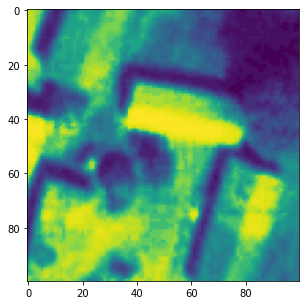

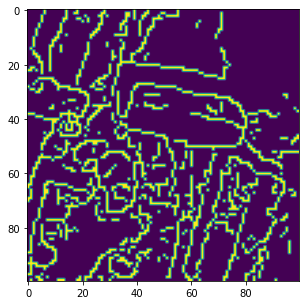

In [47]:
img_zoom2 = cv2.equalizeHist(img_zoom)
edges = cv2.Canny(image=img_zoom2, threshold1=80, threshold2=90,L2gradient=True)

plt.figure(figsize=(5,5))
plt.imshow(img_zoom2)
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(edges)
plt.show()



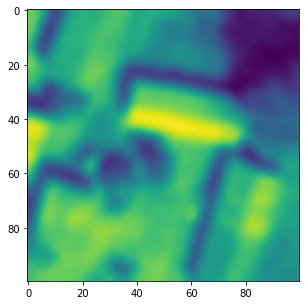

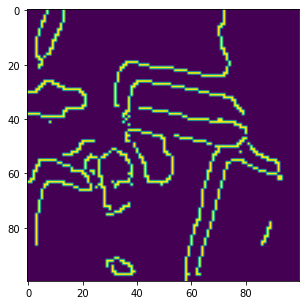

In [50]:
img_zoom3 = cv2.blur(img_zoom,ksize=(5,5))
edges = cv2.Canny(image=img_zoom3, threshold1=50, threshold2=70,L2gradient=True)

plt.figure(figsize=(5,5))
plt.imshow(img_zoom3)
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(edges)
plt.show()



## MEJOR RESULTADO

In [52]:
imagen = cv2.imread('/Users/daniel/OAN/SID/sid_image_extractor/maps_images/Monnon_5_19_500.png')
##ZOOM
imgen_normal = cv2.cvtColor(imagen[1000:1500,800:1200],cv2.COLOR_BGR2RGB)

##TRANSFORMO A ESCALA DE GRISEES
imgen_grises = cv2.cvtColor(imgen_normal,cv2.COLOR_BGR2GRAY)
#ECUALIZO
imagen_eq = cv2.equalizeHist(imgen_grises)
#HAGO LA IMAGEN BORROSA
imagen_borrosa = cv2.blur(imagen_eq, ksize=(9,9))
#DETECTO BORDES - Limites considerados ajutsados manualmente
bordes = cv2.Canny(image=imagen_borrosa, threshold1=70, threshold2=100,L2gradient=True)
th,bordes = cv2.threshold(bordes,10,255,cv2.THRESH_TOZERO)

#DETECTO ESQUINAS DE IMAGEN ORIGINAL
img_copy = imgen_normal.copy()
gray = np.float32(imgen_grises)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=21,k=0.01)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst2 = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_copy[dst2>0.1*dst2.max()]=0

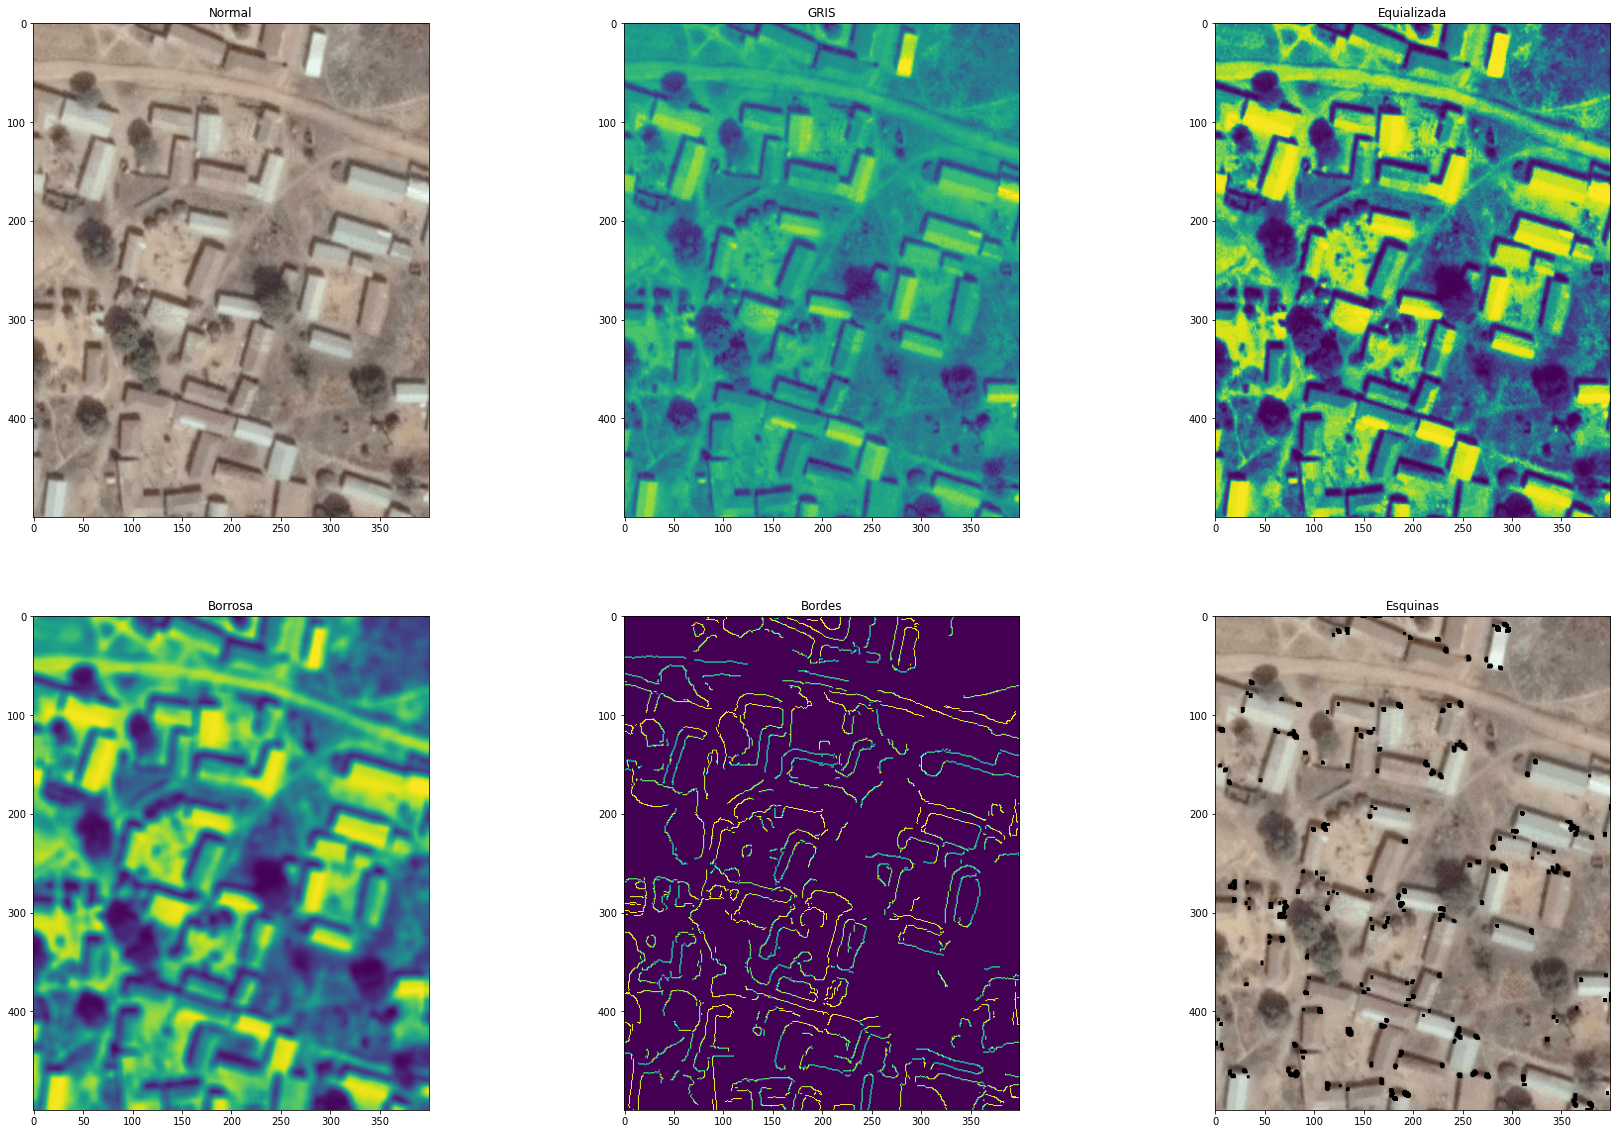

In [53]:
##PLOT
f,ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
imgenes = [imgen_normal,imgen_grises,imagen_eq,imagen_borrosa,bordes,img_copy]
titulos = ['Normal','GRIS','Equializada','Borrosa','Bordes','Esquinas']
for i,im in enumerate(imgenes):
    ax[int(i/3),int(i%3)].set_title(titulos[i])
    ax[int(i/3),int(i%3)].imshow(im)

In [250]:
np.unique(bordes.ravel(),return_counts=True)

(array([  0, 255], dtype=uint8), array([188220,  11780]))